# Testing 1 iteration of forward propagation for the RNN #

In [1]:
from tools.numerical_gradient import *
from models.layers import *
from models.networks.vanilla_rnn import *
from models.solver.solver import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py
import nltk
import re
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
#############
# Constants #
#############

word_sequence_dest = "word_sequence.hdf5"
word_mapping_dest = "word_map.pkl"
word_dataset_dest = "word_dataset.hdf5"
seq_len = 6

delims = ' |\t|\r\n'

In [3]:
# Read in the data of X_all
with h5py.File(word_dataset_dest, 'r') as f:
    bible = f["bible"][:]
max_idx = np.max(bible)

In [4]:
# Create the network with the required parameters: num_words, words_idx, hidden_dim, word_vec_dim

N,T = bible.shape

# Set num_words = 10
num_words = max_idx+1
# Set number of samples = 16
num_samples = 16
# Time dimensions
time_dim = T
# We need to create a hidden_dim representation. Let's give it the dimension 100
hidden_dim = 100
# We need to give the word vector dimensions. Usually it's advised for it to be less than num_words.
word_vec_dim = 100

rnn = VanillaRNN(num_samples, num_words, time_dim, hidden_dim, word_vec_dim)

[[  1.28630356e-02   2.22336542e-03   4.07523036e-03 ...,  -1.75886055e-02
   -1.04596969e-02  -4.26216476e-03]
 [  8.25717163e-03  -6.62108572e-05  -2.48059986e-04 ...,  -7.90081072e-03
    1.95251268e-03   1.28700942e-02]
 [ -2.14773525e-04   1.06409845e-02  -7.68762862e-03 ...,  -1.44793304e-02
   -7.47921337e-04  -4.63226453e-03]
 ..., 
 [ -1.76008706e-02  -1.15328591e-02   6.32889447e-03 ...,   1.47988563e-03
   -5.20839977e-03   1.71664540e-02]
 [ -7.96745946e-03   1.57453195e-02  -9.71106382e-03 ...,   3.27773355e-03
   -8.43188710e-03   2.99288863e-03]
 [  3.33423225e-03  -5.83054227e-03   1.40645247e-02 ...,  -2.81767273e-03
   -6.17008696e-03   1.07273554e-02]]
[[ -5.66342054e-03  -5.74310695e-03   7.20879866e-03 ...,   4.13276018e-03
   -1.06013974e-02  -7.49251526e-03]
 [ -6.57881849e-03   2.13259881e-03   9.15591900e-03 ...,  -3.17509737e-04
   -9.13183198e-03  -6.62513504e-03]
 [ -1.66819053e-02   2.39184285e-05  -1.59728543e-02 ...,   6.20787273e-03
    1.25828630e-03  -

In [5]:
solver = Solver(rnn, {"learning_rate" : 1e-3, "type" : "sgd"})

(16, 100)
loss :  62.5185009067
loss :  62.5135183149
loss :  62.5024263215
loss :  62.4691816632
loss :  62.3309238005
loss :  62.1478690782
loss :  62.1786848763
loss :  61.9059936807
loss :  61.9350983878
loss :  61.5537110061
61.5537110061


models/layers.py:161: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if h0 != None: # Supply an h0 state.


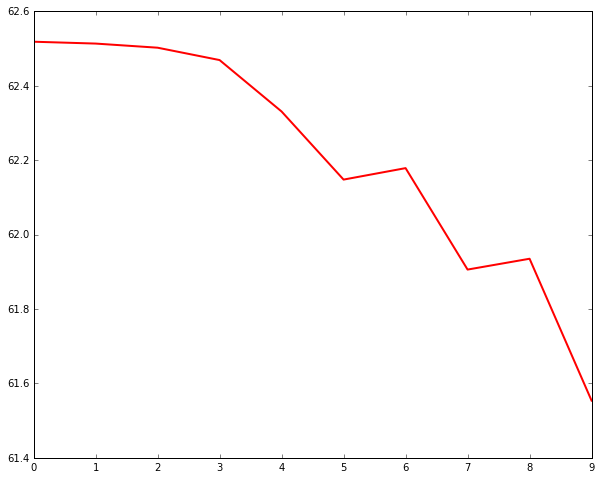

In [6]:
# Run the loss function on the neural network with the parameters: y, h0
history = []
curPtr = 0
for i in xrange(100):
    if curPtr >= N-T-1:
        curPtr = 0
    if curPtr == 0:
        h0 = np.zeros((num_samples, hidden_dim))
        print h0.shape
    loss, l, h0 = rnn.loss(bible[curPtr:curPtr+num_samples, :], bible[curPtr+1:curPtr+num_samples+1, :], h0)
    solver.train(l)
    history.append((i,loss))
    print "loss : " , loss
    curPtr += num_samples
    
print loss
grad_descent_plot = plt.plot(*zip(*history))
plt.setp(grad_descent_plot, 'color', 'r', 'linewidth', 2.0)
plt.show()